
### The Spark Foundation
#### TASK 1 : Prediction of % of score using number hours of study
#### By -  Vidya Shrikant Lad
##### Simple Linear Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data="http://bit.ly/w-data"
student_score_data = pd.read_csv(data)
print("Data imported successfully")
student_score_data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


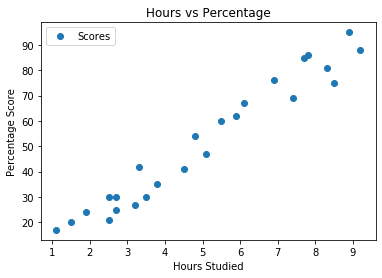

In [3]:
## scatter plot of data to check correlation
student_score_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### Here we say that percentage of marks scored by student is highly positively correlated with number of hours they studied. Hence we go for regression.

In [4]:
## The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

X = student_score_data.iloc[:, :-1].values  
y =student_score_data.iloc[:, 1].values  

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Creating model 

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


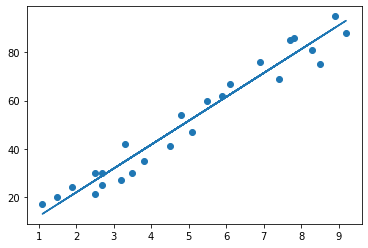

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Here actual and fitted vlues are nearly same

In [8]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


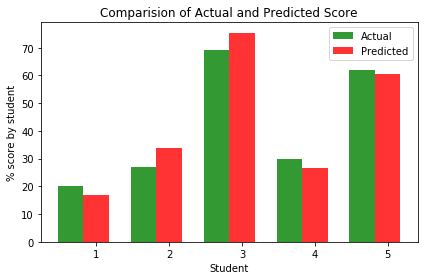

In [9]:
Actual=y_test
Predicted=y_pred
# create plot
n_groups=5
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index,Actual,bar_width,alpha=opacity,color='g',label='Actual')
rects2 = plt.bar(index + bar_width, Predicted, bar_width,alpha=opacity,color='r',label='Predicted')
plt.xlabel('Student')
plt.ylabel('% score by student')
plt.title('Comparision of Actual and Predicted Score')
plt.xticks(index + bar_width, ('1', '2', '3', '4','5'))
plt.legend()

plt.tight_layout()
plt.show()

#### Here we say that actual and predicted don't have that much deifference

In [10]:
# We can also test with your own 
hours = [[9.25]]
own_pred = regressor.predict(hours)
own_pred 

array([93.69173249])

 

### Now, the final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean absolute  error. There are many such metrics.

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
